In [1]:
from IPython.display import Image, display
import requests
import json
import os

pp = lambda x: print(json.dumps(x, indent=2))

SKEMA_EQ2MML_SERVICE = os.environ.get("SKEMA_EQMML_ADDRESS", "http://eq2mml:8001")
SKEMA_PA_SERVICE = os.environ.get("SKEMA_PA_ADDRESS", "http://skema-py:8000")
SKEMA_COMMENT_EXTRACTION_SERVICE = os.environ.get("SKEMA_COMMENT_EXTRACTION_ADDRESS", "http://skema-rs:8080")

# Processing equations

## Generating pMML from LaTeX equations

In [2]:
tex_equation = "E = mc^{2}"
r = requests.post("{}/latex/mml".format(SKEMA_EQ2MML_SERVICE), json={"tex_src": tex_equation})
print(r.text)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block" alttext="E = mc^{2}">
  <mi>E</mi>
  <mo>=</mo>
  <mi>m</mi>
  <msup>
    <mi>c</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
</math>


## Generating pMML from equation images

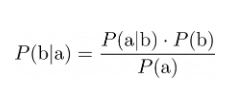

In [3]:
display(Image(filename="/data/skema/images/bayes-rule-white-bg.png"))

In [4]:
files = {
  "data": open("/data/skema/images/bayes-rule-white-bg.png", "rb"),
}
r = requests.post("{}/image/mml".format(SKEMA_EQ2MML_SERVICE), files=files)
print(r.text)

<math> <mrow> <mn> <mtr> <mtd> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mi> a </mi> <mo> ) </mo> </mrow> </msub> <mo> = </mo> <mrow> <mfrac> <mrow> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> <mo> &#x22C5 </mo> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> </mrow> <mrow> <msubsup> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mo> ) </mo> </mrow> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msubsup> </mrow> </mfrac> </mrow> </math>


# Code $\rightarrow$ function network

## Processing one or more files (Python)

In [5]:
system = {
  "files": [
    "example.py"
  ],
  "blobs": [
    "greet = lambda: print('\''howdy!'\'')\ngreet()"
  ],
  "system_name": "my-system",
  "root_name": "string"
}

response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.6",
  "name": "my-system",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "example",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "FUNCTION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "name": "%lambda0_id0",
            "metadata": 7
          },
          {
            "function_type": "FUNCTION",
            "body": 2,
            "gromet_type": "GrometBoxFunction",
            "name": "greet_id2",
            "metadata": 9
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "greet",
            "box": 1,
            "gromet_type": "GrometPort",
            "metadata": 8
          }
        ],
        

## Processing one or more files (Fortran)

In [6]:
system = {
  "files": ["exp1.f95"],
  "blobs": ["program exp1\ninteger :: x=2\nend program exp1"],
  "system_name": "my-system",
  "root_name": "string"
}
response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.6",
  "name": "my-system",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1.f95",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "EXPRESSION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "metadata": 5
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "x",
            "box": 1,
            "gromet_type": "GrometPort"
          }
        ],
        "gromet_type": "GrometFN"
      },
      "fn_array": [
        {
          "b": [
            {
              "function_type": "EXPRESSION",
              "gromet_type": "GrometBoxFunction"
            }
          ],
          "opo": [
            {
          

## Processing one or more files (mixed languages)

In [7]:
system = {
  "files": ["exp1.py", "exp1.f95"],
  "blobs": ["x=2", "program exp1\ninteger :: x=2\nend program exp1"],
  "system_name": "my-system",
  "root_name": "string"
}
response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.6",
  "name": "my-system",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "EXPRESSION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "metadata": 5
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "x",
            "box": 1,
            "gromet_type": "GrometPort"
          }
        ],
        "gromet_type": "GrometFN"
      },
      "fn_array": [
        {
          "b": [
            {
              "function_type": "EXPRESSION",
              "gromet_type": "GrometBoxFunction"
            }
          ],
          "opo": [
            {
              

# Comment extraction

## Extracting from a single file (Python)

In [8]:
code = """
class MyNetwork:
  def __init__(self):
    '''WARNING: do not feed after midnight
    '''
    # TODO: implement me!
    pass


# we'll use this for xyz
clf = MyNetwork()
""".strip()

response = requests.post("{}/extract-comments".format(SKEMA_COMMENT_EXTRACTION_SERVICE), json={"language" : "Python", "code" : code})
pp(response.json())

{
  "comments": [
    {
      "line_number": 5,
      "contents": " TODO: implement me!"
    },
    {
      "line_number": 9,
      "contents": " we'll use this for xyz"
    }
  ],
  "docstrings": {
    "__init__": [
      "WARNING: do not feed after midnight",
      "    "
    ]
  }
}
